# 网络生成

## 通用库引入

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

N = 30
direct_flag = True

## 设置随机种子

In [3]:
import numpy as np
rand_seed = 40

# for random results随机结果
# rand_seed = np.random.randint(0, high=2**32-1)

# Set the random seed for reproducibility
np.random.seed(rand_seed)

## 生成E-R网络

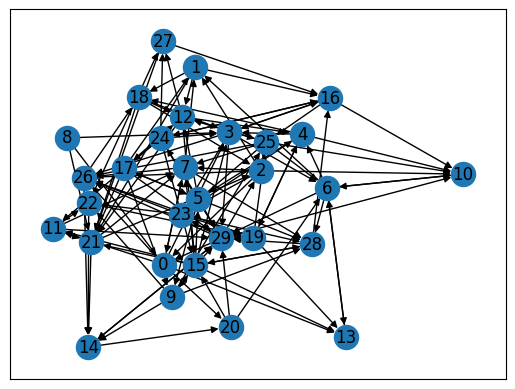

In [6]:
m = 2  # number of edges to attach from a new node to existing nodes
G = nx.erdos_renyi_graph(N, (2-(direct_flag != True)) *
                         m/N, directed=direct_flag, seed=rand_seed)
fig = plt.figure(1)
layout = nx.spring_layout(G)
nx.draw_networkx(G, pos=layout)
plt.show('graph_ER.png')

In [7]:
# graph metrics
print(G.is_directed())

True


## 生成barabasi-albert网络

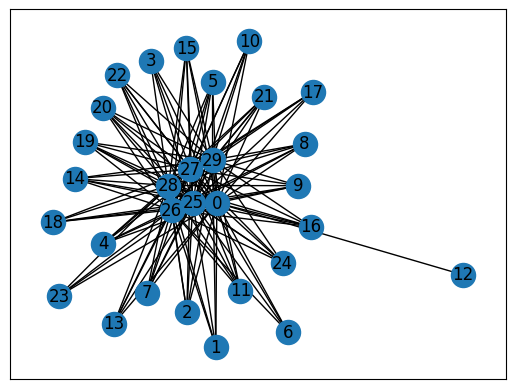

In [4]:
# 生成barabasi-albert网络
G = nx.barabasi_albert_graph(N, N-np.random.randint(0, N), seed=rand_seed)
fig = plt.figure(1)
layout = nx.spring_layout(G)
nx.draw_networkx(G, pos=layout)
plt.show()

# domirank指标生成

## 计算sigma值

In [5]:
import drank as dr
GAdj = nx.to_scipy_sparse_array(G)
# 如果它是有向的（取决于链接的交互方式...）则翻转整个网络的方向
if direct_flag:
    GAdj = sp.sparse.csr_array(GAdj.T)
    
# 计算矩阵特征值
lambN = dr.find_eigenvalue(GAdj, maxIter=500, dt=0.01, checkStep=25)
print(f'\nThe found smallest eigenvalue was: lambda_N = {lambN}')

if __name__ == '__main__':
    sigma, sigmaArray = dr.optimal_sigma(GAdj, endVal=lambN)
    print(f'\n The optimal sigma was found to be: {sigma}')

Current Interval : [-29.0, -1.0]
Current Interval : [-29.0, -1.3181818181818183]
Current Interval : [-29.0, -1.7313432835820897]
Current Interval : [-29.0, -2.2634146341463417]
Current Interval : [-29.0, -2.9413629160063395]
Current Interval : [-29.0, -3.793561573837507]
Current Interval : [-29.0, -4.846743920352538]
Current Interval : [-29.0, -6.121308940994589]
Current Interval : [-10.10884643206672, -6.121308940994589]
Current Interval : [-10.10884643206672, -6.791004137753607]
Current Interval : [-10.10884643206672, -7.3980346323548005]
Current Interval : [-10.10884643206672, -7.929642480704409]
Current Interval : [-8.88761120582346, -7.929642480704409]
Current Interval : [-8.88761120582346, -8.149237905915705]
Current Interval : [-8.88761120582346, -8.322085410272981]
Current Interval : [-8.88761120582346, -8.456610631513353]
Current Interval : [-8.88761120582346, -8.560393709999985]
Current Interval : [-8.88761120582346, -8.639918239850907]
Current Interval : [-8.762014567300932,

## 递归算法

In [6]:
flag, ourDomiRankDistribution = dr.domirank_by_recursive(GAdj, sigma=sigma)

if flag:
    print(ourDomiRankDistribution)
else:
    print("Can not find recursive algorithm solve of Dominance rank distribution.")


[ 47.37105   -23.05919   -27.545572  -23.415552  -27.545572  -27.545572
 -19.580769  -27.545572  -27.545572  -27.545572  -23.415552  -27.545572
  -5.2025766 -23.710781  -27.545572  -27.545572  -27.545572  -22.768206
 -23.710781  -27.545572  -27.545572  -27.545572  -27.545572  -19.224403
 -27.545572   46.586285   43.58207    40.988834   37.81274    35.181652 ]


## 解析算法

In [7]:
analyticalDomiRankDistribution = dr.domirank_by_annalytical(
    GAdj, sigma=sigma)
print(analyticalDomiRankDistribution)

[ 95.80910422 -47.56671404 -56.82674306 -48.29729589 -56.82674306
 -56.82674306 -40.37012336 -56.82674306 -56.82674306 -56.82674306
 -48.29729589 -56.82674306 -10.71258438 -48.89957053 -56.82674306
 -56.82674306 -56.82674306 -46.97323471 -48.89957053 -56.82674306
 -56.82674306 -56.82674306 -56.82674306 -39.63954151 -56.82674306
  94.31710373  88.2060622   82.95361875  76.48778304  71.1574988 ]


# 网络可视化过程
1. 节点攻击对比
2. 网络绘制

## 节点攻击对比

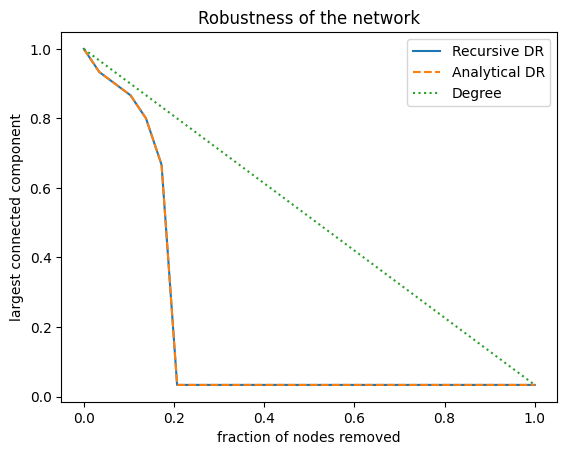

In [8]:
# generate the attack using the centrality (descending)
ourDomiRankAttack = dr.generate_attack(ourDomiRankDistribution)
analyticalDomiRankAttack = dr.generate_attack(analyticalDomiRankDistribution)
degreeAttack = dr.generate_attack(
    nx.degree_centrality(G))
# attack the network and get the largest connected component evolution
domiRankRobustness, domiRankLinks = dr.network_attack_sampled(
    GAdj, ourDomiRankAttack)
domiRankRobustnessAnalytical, domiRankLinksAnalytical = dr.network_attack_sampled(
    GAdj, analyticalDomiRankAttack)
degreeRobustness, degreeLinks = dr.network_attack_sampled(
    GAdj, degreeAttack)

# generating the plot
fig2 = plt.figure(2)
ourRangeNew = np.linspace(0, 1, domiRankRobustness.shape[0])
plt.title('Robustness of the network')
plt.plot(ourRangeNew, domiRankRobustness, label='Recursive DR')
plt.plot(ourRangeNew, domiRankRobustnessAnalytical,
         label='Analytical DR', linestyle='--')
plt.plot(ourRangeNew, degreeRobustness, label='Degree', linestyle=':')
plt.legend()
plt.xlabel('fraction of nodes removed')
plt.ylabel('largest connected component')
plt.show()

## 寻找sigma过程

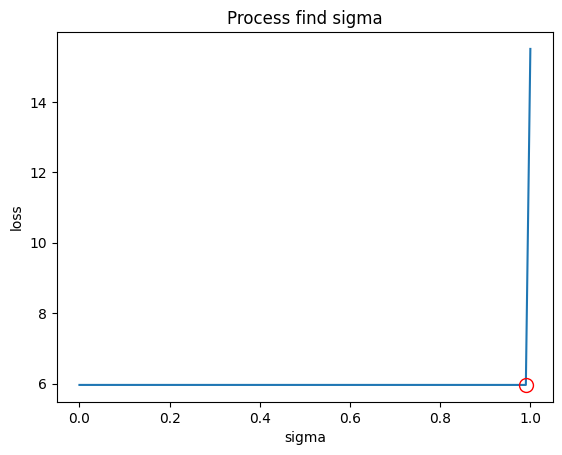

In [9]:
fig1 = plt.figure(1)
ourRange = np.linspace(0, 1, sigmaArray.shape[0])
index = np.where(sigmaArray == sigmaArray.min())[0][-1]

plt.plot(ourRange, sigmaArray)
plt.plot(ourRange[index], sigmaArray[index], 'ro', mfc='none', markersize=10)
plt.xlabel('sigma')
plt.ylabel('loss')
plt.title('Process find sigma')
plt.show()